In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings ('ignore')

In [3]:
neowise = pd.read_csv ('History/Wise.Csv')
asassn = pd.read_csv ('History/asas_sn.csv')
allwise = pd.read_csv ('History/allwise2010.csv') 
vphas = pd.read_csv ('History/VPHAS.csv')
denis = pd.read_csv ('History/DENIS.csv')
twomass = pd.read_csv ('History/2MASS.csv') 
glimpse = pd.read_csv ('History/glimpse360.csv')
nsc = pd.read_csv ('History/nsc_dr2.csv')
skymapper = pd.read_csv ('History/skymapper.csv') #v_psf, e_v_psf, u_psf, e_u_psf,g_psf, r_psf, i_psf, z_psf, mean_epoch
usnoa2 = pd.read_csv ('History/usno_a2.csv')
usnob1 = pd.read_csv ('History/usno_b1.csv')
vista_ks = pd.read_csv ('History/vvvx_ks.csv')
vista_j = pd.read_csv ('History/vvvx_j.csv')
vista_h = pd.read_csv ('History/vvvx_h.csv')
#asas = pd.read_csv ('asas_data.csv') <- wrong center point

In [4]:
print(vista_j)

           RA        DEC  Japermag1  Japermag1Err  Japermag3  Japermag3Err  \
0  123.847046 -38.989780  12.891376      0.001479  12.695080      0.001075   
1  123.847046 -38.989784  12.783245      0.001415  12.645891      0.001053   
2  123.847030 -38.989800  12.413356      0.001319  12.384095      0.001040   

            mjd                              fits  
0  58476.214189  ADP.2021-03-12T18_13_33.692.fits  
1  58478.233487  ADP.2021-03-12T18_13_35.083.fits  
2  58232.068323  ADP.2021-03-12T18_16_13.104.fits  


In [5]:
denis_mjd = denis['obsjd'] - 2400000
twomass_mjd = twomass['jdate'] - 2400000 

In [6]:
#the old ASAS data :)

# -  HJD-2450000
# -  grade :
#    A - best data, no 29.999 (not measured) indication
#    B - mean data, no 29.999 (not measured) indication
#    C - A and B with 29.999 (not measured) indication
#    D - worst data, probably useless
#LC2 = LC[(LC['w2rchi2'] < 20) & (LC['cc_flags'] == '0000') & (LC['w2snr'] >= 25)]

#asas_filtered = asas[(asas['MAG_0'] <29) & (asas['MAG_1'] <29) & (asas['MAG_2'] <29) & (asas['MAG_3'] <29) & (asas['MAG_4'] <29)]
#asas_v = asas_filtered['MAG_0'], asas_filtered['MAG_1'], asas_filtered['MAG_2'], asas_filtered['MAG_3'], asas_filtered['MAG_4']

In [7]:
#filtering neowise (post cryo) data
neowise_filtered = neowise[(neowise['w2rchi2'] < 20) & (neowise['cc_flags'] == '0000') & (neowise['w2snr'] >= 25)]
#naming neowise data and mags
w1 = neowise_filtered['w1mpro']
w2 = neowise_filtered['w2mpro']
time = neowise_filtered['mjd']

In [8]:
#filtering asas-sn data
asassn_g = asassn[(asassn['Filter']=='g') * (asassn['flux_err'] < 0.5)]
asassn_v = asassn[(asassn['Filter']=='V') * (asassn['flux_err'] < 0.5)]
#asas-sn data and mags
gmag = asassn_g['mag']
vmag = asassn_v['mag']
time2 =  asassn_g['HJD']
time3 = asassn_v['HJD']

In [9]:
#allwise (pre-cryo wise data)
all_w1 = allwise['w1mpro_ep']
all_w2 = allwise['w2mpro_ep']
all_w3 = allwise['w3mpro_ep'] #bad snr
all_w4 = allwise['w4mpro_ep'] #no-show
all_time = allwise['mjd']


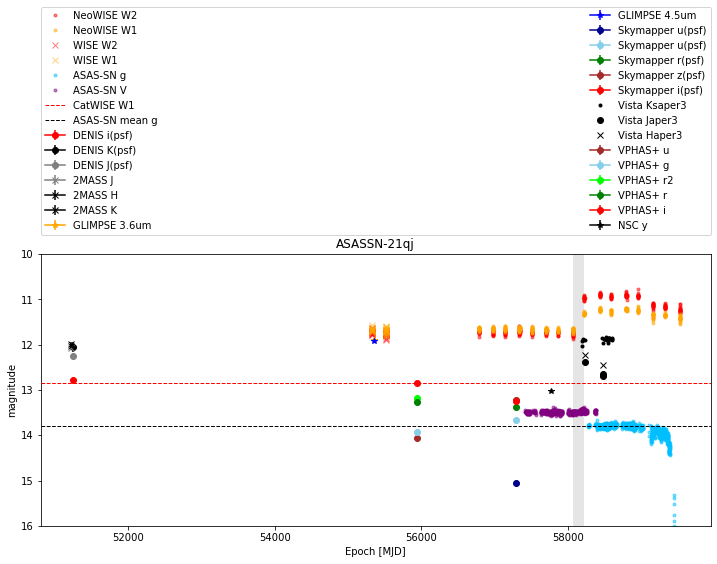

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12,5))  # Create a figure containing a single axes.

ax.set_title('ASASSN-21qj')
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('magnitude')

#NEOWISE-R
ax.plot (time, w2, linewidth = 0, marker = '.',color = 'red', alpha = 0.5, label= "NeoWISE W2")  
ax.plot (time, w1, linewidth = 0, marker = '.',color = 'orange', alpha = 0.5, label = "NeoWISE W1")  

#OLD ALLWISE FROM 2010 w3 and w4 are no-detections!
#ax.plot (all_time, all_w4, linewidth = 0, marker = 'x',color = 'blue', alpha = 0.5, label ="AllWISE W4") #Non-detection
#ax.plot (all_time, all_w3, linewidth = 0, marker = '>',color = 'k', alpha = 0.5, label ="AllWISE W3") #faint snr ~3
ax.plot (all_time, all_w2, linewidth = 0, marker = 'x',color = 'red', alpha = 0.5, label ="WISE W2")
ax.plot (all_time, all_w1, linewidth = 0, marker = 'x',color = 'orange', alpha = 0.5, label ="WISE W1")

#ASAS-SN V & g
ax.plot (time2, gmag, linewidth = 0, marker = '.',color = 'deepskyblue', alpha = 0.5, label ="ASAS-SN g")  
ax.plot (time3, vmag, linewidth = 0, marker = '.',color = 'purple', alpha = 0.5, label ="ASAS-SN V")  


#CATWISE STACKED WISE DATA (we don't need this as it runs 2010 - 2018 and overlaps epochs after reddning)
ax.axhline(12.85, xmax = 58000, c='red', linestyle='dashed', lw =1,zorder=3,label= "CatWISE W1")
#ax.axhline(11.817, c='orange', linestyle='dashed', lw =1,zorder=3,label= "CatWISE W2")

#Deep Near Inrared Survey DENIS PSF!
ax.errorbar (denis_mjd, denis['ipsf'], denis['e_ipsf'], color='r', marker='o', label ="DENIS i(psf)") 
ax.errorbar (denis_mjd, denis['kpsf'], denis['e_kpsf'], color='k', marker='o', label ="DENIS K(psf)") 
ax.errorbar (denis_mjd, denis['jpsf'], denis['e_jpsf'], color='grey', marker='o', label ="DENIS J(psf)") 

#2MASS
ax.errorbar (twomass_mjd, twomass['j_m'], twomass['j_cmsig'], color='grey', marker='x', label ="2MASS J") 
ax.errorbar (twomass_mjd, twomass['h_m'], twomass['h_cmsig'], color='k', marker='x', label ="2MASS H") 
ax.errorbar (twomass_mjd, twomass['k_m'], twomass['k_cmsig'], color='k', marker='x', label ="2MASS K") 

#GLIMPSE360
ax.errorbar (glimpse['mjd'], glimpse['mag3_6'], glimpse['d3_6m'], color='orange', marker='*', label ="GLIMPSE 3.6um") 
ax.errorbar (glimpse['mjd'], glimpse['mag4_5'], glimpse['d4_5m'], color='b', marker='*', label ="GLIMPSE 4.5um") 

#skymapper
ax.errorbar (skymapper['mean_epoch'], skymapper['u_psf'], skymapper['e_u_psf'], color='darkblue', marker='o', label ="Skymapper u(psf)") 
ax.errorbar (skymapper['mean_epoch'], skymapper['g_psf'], skymapper['e_g_psf'], color='skyblue', marker='o', label ="Skymapper u(psf)") 
ax.errorbar (skymapper['mean_epoch'], skymapper['r_psf'], skymapper['e_r_psf'], color='green', marker='o', label ="Skymapper r(psf)") 
ax.errorbar (skymapper['mean_epoch'], skymapper['z_psf'], skymapper['e_z_psf'], color='brown', marker='o', label ="Skymapper z(psf)") 
ax.errorbar (skymapper['mean_epoch'], skymapper['i_psf'], skymapper['e_i_psf'], color='r', marker='o', label ="Skymapper i(psf)") 

#vista vvvx
ax.errorbar (vista_ks['mjd'], vista_ks['KsApermag3'], vista_ks['KsApermag3_Err'], linewidth = 0,color ='k', marker= '.', label ="Vista Ksaper3")
ax.errorbar (vista_j['mjd'], vista_j['Japermag3'], vista_j['Japermag3Err'], color ='k', linewidth = 0, marker= 'o', label ="Vista Japer3")
ax.errorbar (vista_h['mjd'], vista_h['HApermag3'], vista_h['HApermag3_err'], color ='k',linewidth = 0, marker= 'x', label ="Vista Haper3")

#old ASAS #off-center warning!!!
#ax.plot (asas_mjd, asas_filtered['MAG_0'], linewidth = 0, marker = '.',color = 'k', alpha = 0.2, label ="ASAS V")  
#ax.plot (asas_mjd, asas_filtered['MAG_1'], linewidth = 0, marker = '.',color = 'k', alpha = 0.2, label ="ASAS V")  
#ax.plot (asas_mjd, asas_filtered['MAG_2'], linewidth = 0, marker = '.',color = 'k', alpha = 0.2, label ="ASAS V")  
#ax.plot (asas_mjd, asas_filtered['MAG_3'], linewidth = 0, marker = '.',color = 'k', alpha = 0.2, label ="ASAS V")  
#ax.plot (asas_mjd, asas_filtered['MAG_4'], linewidth = 0, marker = '.',color = 'k', alpha = 0.2, label ="ASAS V")  

ax.errorbar (vphas['MJDr'], vphas['umag'], vphas['e_umag'], color='brown', marker='o', label ="VPHAS+ u") 
ax.errorbar (vphas['MJDr'], vphas['gmag'], vphas['e_gmag'], color='skyblue', marker='o', label ="VPHAS+ g") 
ax.errorbar (vphas['MJDr'], vphas['r2mag'], vphas['e_r2mag'], color='lime', marker='o', label ="VPHAS+ r2") 
ax.errorbar (vphas['MJDr'], vphas['rmag'], vphas['e_rmag'], color='green', marker='o', label ="VPHAS+ r") 
ax.errorbar (vphas['MJDr'], vphas['imag'], vphas['e_imag'], color='r', marker='o', label ="VPHAS+ i") 

ax.errorbar (nsc['mjd'], nsc['ymag'], nsc['yerr'] , color = 'k', marker='*', label ="NSC y")

#asas-sn means and errors:
ax.axhline(y=13.793, xmin=0, xmax=58000, c='k', linestyle='dashed', lw =1,zorder=3,label= "ASAS-SN mean g")
#ax.axhline(13.793 - 0.016279621513866173, linestyle='dashed', c='red',lw=1, zorder=3)
#ax.axhline(13.793 + 0.016279621513866173, linestyle='dashed', c='red',lw=1, zorder=3)

             
#ax.set_xlim(58270,58900) 
ax.set_ylim(16,10)
#box between WISE epochs where the event begun:

t_match = (58072, 58227)
t_region = (['mjd']>t_match[0] * ['mjd']<t_match[1])
(ymi,yma) = ax.get_ylim()

event_box =Rectangle((t_match[0], ymi), t_match[1]-t_match[0], (yma-ymi),facecolor="black", alpha=0.1)
ax.add_patch(event_box)


ax.legend(bbox_to_anchor=(0., 1.07, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
#plt.savefig(xx.png)